In [2]:
import sys
import time
import cv2
import numpy as np
import enum
import os
import pandas as pd
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import torch.optim as optim
from tqdm import tqdm
import torch
import numpy as np
import matplotlib.pyplot as plt
import os
from torch.autograd import Variable
import torch.nn.functional as F
from skimage import exposure 
import cv2

from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))

  0%|          | 0/1760 [00:00<?, ?it/s]

extSSD1 | 200127_drive_4_W60_M8_RF1
(1242, 2208)


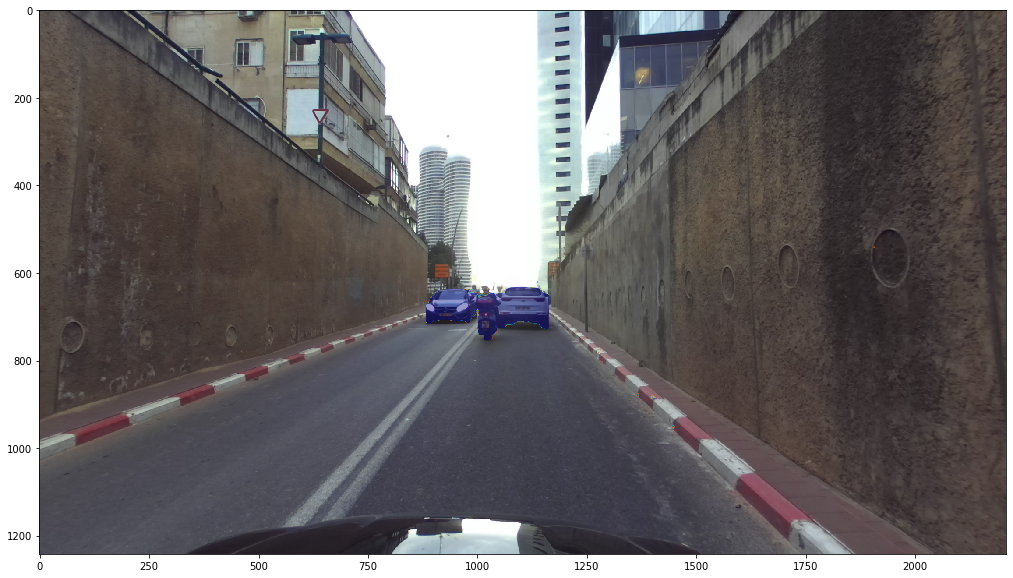

In [11]:
discs = ['extSSD1']

for disc in discs:
    b = "/workspace/" + disc + "/64mWF/"
    for dataset in os.listdir(b):
        if "drive" not in dataset:
            continue    
        base = b + dataset
        print(disc,'|',dataset)
        folderPath = "/workspace/"+disc+"/64mWF/" + dataset + "/camera_rgb"
        baseSavePath = "/workspace/"+disc+"/64mWF/" + dataset + "/camera_vehicle_seg/"
        
        for imPath in tqdm(os.listdir(folderPath)):
            img = cv2.cvtColor(cv2.imread(os.path.join(folderPath, imPath)),cv2.COLOR_BGR2RGB)
            cleanImg = img.copy()
            # Save array
            label = baseSavePath + 'camera_vehicle_seg' + imPath[10:-4] + ".npz"
            probs = np.load(label)["arr_0"]
            
            print(probs.shape)
            
            probsImg = np.stack([probs,probs,probs],axis=2)
            heatMap  = np.uint8(exposure.rescale_intensity(np.copy(probs), out_range=(0, 255)))
            heatMap  = cv2.applyColorMap(heatMap, cv2.COLORMAP_JET)
            heatMap  = cv2.addWeighted(heatMap, 0.4, cleanImg, 0.6, 0)
            heatMap  = np.where(probsImg>0.2,heatMap,cleanImg)
            
            plt.figure(figsize=(20,10))
            plt.imshow(heatMap)
            plt.show()
            break
        break
                